# Parsing blast output for matches to uniprot ref proteom

In [1]:
import Bio
import os
from Bio import SearchIO
from Bio.Blast import NCBIXML

In [2]:
experiment_name = "MOUSE2HUMAN"
back_path = "../../"
proteome_file = "uniprot-proteome_UP000000589.fasta"

In [3]:
with open(back_path+"05_Output/"+experiment_name+"/"+experiment_name+"_results_blast2ref.xml") as resultHandle:
    blast_result = list(NCBIXML.parse(resultHandle))

In [4]:
d = {}
s = 0
for record in blast_result:
    if (len(record.query.split("|")) > 1) :
        qname = record.query.split("|")[1]
    else:
        qname = record.query.strip().split(" ")[0]
    if record.alignments :
        d[record.query] = [record.alignments[0]]
        for align in record.alignments:
                if align.hsps[0].expect < 1e-70:
                    d[record.query].append(align)

In [5]:
for val in d.values():
    print(val)

[<Bio.Blast.Record.Alignment object at 0x7f9d841d9f90>, <Bio.Blast.Record.Alignment object at 0x7f9d841d9f90>]
[<Bio.Blast.Record.Alignment object at 0x7f9d841dacb0>, <Bio.Blast.Record.Alignment object at 0x7f9d841dacb0>, <Bio.Blast.Record.Alignment object at 0x7f9d841dad10>, <Bio.Blast.Record.Alignment object at 0x7f9d841dadd0>, <Bio.Blast.Record.Alignment object at 0x7f9d841daef0>, <Bio.Blast.Record.Alignment object at 0x7f9d841dafb0>, <Bio.Blast.Record.Alignment object at 0x7f9d841db010>, <Bio.Blast.Record.Alignment object at 0x7f9d841db0a0>, <Bio.Blast.Record.Alignment object at 0x7f9d841db1f0>, <Bio.Blast.Record.Alignment object at 0x7f9d841db2e0>, <Bio.Blast.Record.Alignment object at 0x7f9d841db4f0>, <Bio.Blast.Record.Alignment object at 0x7f9d841db5e0>, <Bio.Blast.Record.Alignment object at 0x7f9d841db970>, <Bio.Blast.Record.Alignment object at 0x7f9d841dba00>]
[<Bio.Blast.Record.Alignment object at 0x7f9d5755a410>, <Bio.Blast.Record.Alignment object at 0x7f9d5755a410>, <Bio.Bl

# Percentage identity

In [6]:
import matplotlib.pyplot as plt

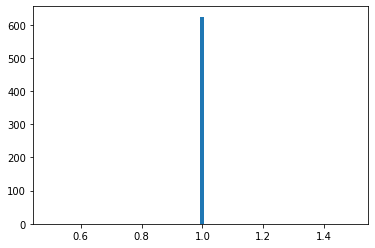

In [7]:
plt.hist([el.hsps[0].positives/el.hsps[0].align_length for el in val for val in d.values()],bins=100)
plt.show()

# Loading proteom

In [8]:
from Bio import SeqIO

In [10]:
with open(back_path+"01_Reference/"+experiment_name+"/"+proteome_file) as handle:
    uniprot_ref = SeqIO.to_dict(SeqIO.parse(handle, "fasta"))

In [11]:
for key in uniprot_ref.keys():
    print(key)

sp|Q99J83|ATG5_MOUSE
sp|P10417|BCL2_MOUSE
sp|O88597|BECN1_MOUSE
sp|Q8K019|BCLF1_MOUSE
sp|Q8VC31|CCDC9_MOUSE
sp|Q3TTA7|CBLB_MOUSE
sp|E9Q3C1|C2CD2_MOUSE
sp|Q9JLK3|CABP5_MOUSE
sp|A2ATD1|ISM1_MOUSE
sp|Q6GU68|ISLR_MOUSE
sp|P83891|IMPL_MOUSE
sp|Q80ZF2|IFNE_MOUSE
sp|Q8K337|I5P2_MOUSE
sp|P81122|IRS2_MOUSE
sp|Q6P1C1|IPPK_MOUSE
sp|Q6ZPU9|KBP_MOUSE
sp|A2A5X4|KR291_MOUSE
sp|Q3U2K5|KDM4D_MOUSE
sp|Q8BSM7|LAT3_MOUSE
sp|Q8CB14|LAS2_MOUSE
sp|Q8BGA5|KRR1_MOUSE
sp|Q14C37|LEMD1_MOUSE
sp|Q99M74|KRT82_MOUSE
sp|Q9Z1M4|KS6B2_MOUSE
sp|P06151|LDHA_MOUSE
sp|P01845|LAC3_MOUSE
sp|Q925H6|KR193_MOUSE
sp|A6H694|LRC63_MOUSE
sp|Q149R9|LPAR5_MOUSE
sp|P54310|LIPS_MOUSE
sp|Q6PFC5|LRIT2_MOUSE
sp|Q9JL06|LPAR2_MOUSE
sp|Q924H2|MED15_MOUSE
sp|Q5UAK0|MIER1_MOUSE
sp|Q3UQI9|MINY4_MOUSE
sp|P24668|MPRD_MOUSE
sp|Q9CQ19|MYL9_MOUSE
sp|Q66X19|NAL4E_MOUSE
sp|F8VQB6|MYO10_MOUSE
sp|Q66X05|NAL4F_MOUSE
sp|Q8BP56|PGGHG_MOUSE
sp|Q05769|PGH2_MOUSE
sp|Q9CZG9|PDZ11_MOUSE
sp|Q9CQH0|PDZ1I_MOUSE
sp|P47857|PFKAM_MOUSE
sp|O70400|PDLI1_MOUSE
sp|Q8R1G6

In [12]:
for key in d.keys():
    print(key)

P61514 <unknown description>
Q4FK74 <unknown description>
Q01149 <unknown description>
O88544 <unknown description>
P97310 <unknown description>
Q6A0D1 <unknown description>
Q5M9L0 <unknown description>
A0A140LJ59 <unknown description>
A0A0U1RP81 <unknown description>
Q9CZW5 <unknown description>
Q3U2W2 <unknown description>
Q91VD9 <unknown description>
E9Q7G0 <unknown description>
Q9D051 <unknown description>
P35282 <unknown description>
Q99MR6 <unknown description>
Q8K2B3 <unknown description>
O35295 <unknown description>
D3Z0S6 <unknown description>
Q91YT7 <unknown description>
B8JJI7 <unknown description>
Q99LF4 <unknown description>
A0A087WR50 <unknown description>
Q8K4Z5 <unknown description>
Q921M3 <unknown description>
A0A0U1RPL0 <unknown description>
A0A140LHA2 <unknown description>
E9QL13 <unknown description>
Q9JLV1 <unknown description>
A2ATP5 <unknown description>
P25206 <unknown description>
P62900 <unknown description>
P83882 <unknown description>
O88477 <unknown descrip

In [13]:
uniprot2seq = {}
for key,values in d.items():
    s = key.strip().split(" ")[0]
    if "|" in s :
        s = s.split("|")[1]
    uniprot2seq[s] = []
    for val in values :
        el = val.title.strip().split(" ")[1]
        uniprot2seq[s].append(uniprot_ref[el])

# Saving as pickle object

In [15]:
import pickle

In [16]:
with open(back_path+"05_Output/"+experiment_name+"/"+experiment_name+"_matches2refproteom.pickle", 'wb') as f:
    pickle.dump(uniprot2seq, f, pickle.HIGHEST_PROTOCOL)